In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.special import erf
from matplotlib.patches import Ellipse
from scipy.stats import gaussian_kde

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [2]:
# Data generated using https://github.com/tcallister/get-lvk-data
sampleDict = np.load('./../../get-lvk-data/sampleDict_FAR_1_in_1_yr.pickle',allow_pickle=True)
sampleDict.keys()

dict_keys(['GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729', 'GW170809', 'GW170814', 'GW170817', 'GW170818', 'GW170823', 'S190408an', 'S190412m', 'S190413ac', 'S190413i', 'S190421ar', 'S190425z', 'S190426c', 'S190503bf', 'S190512at', 'S190513bm', 'S190517h', 'S190519bj', 'S190521g', 'S190521r', 'S190527w', 'S190602aq', 'S190620e', 'S190630ag', 'S190701ah', 'S190706ai', 'S190707q', 'S190708ap', 'S190719an', 'S190720a', 'S190725t', 'S190727h', 'S190728q', 'S190731aa', 'S190803e', 'S190805bq', 'S190814bv', 'S190828j', 'S190828l', 'S190910s', 'S190915ak', 'S190917u', 'S190924h', 'S190925ad', 'S190929d', 'S190930s', 'S191103a', 'S191105e', 'S191109d', 'S191127p', 'S191129u', 'S191204r', 'S191215w', 'S191216ap', 'S191222n', 'S191230an', 'S200105ae', 'S200112r', 'S200115j', 'S200128d', 'S200129m', 'S200202ac', 'S200208q', 'S200209ab', 'S200216br', 'S200219ac', 'S200224ca', 'S200225q', 'S200302c', 'S200311bg', 'S200316bj'])

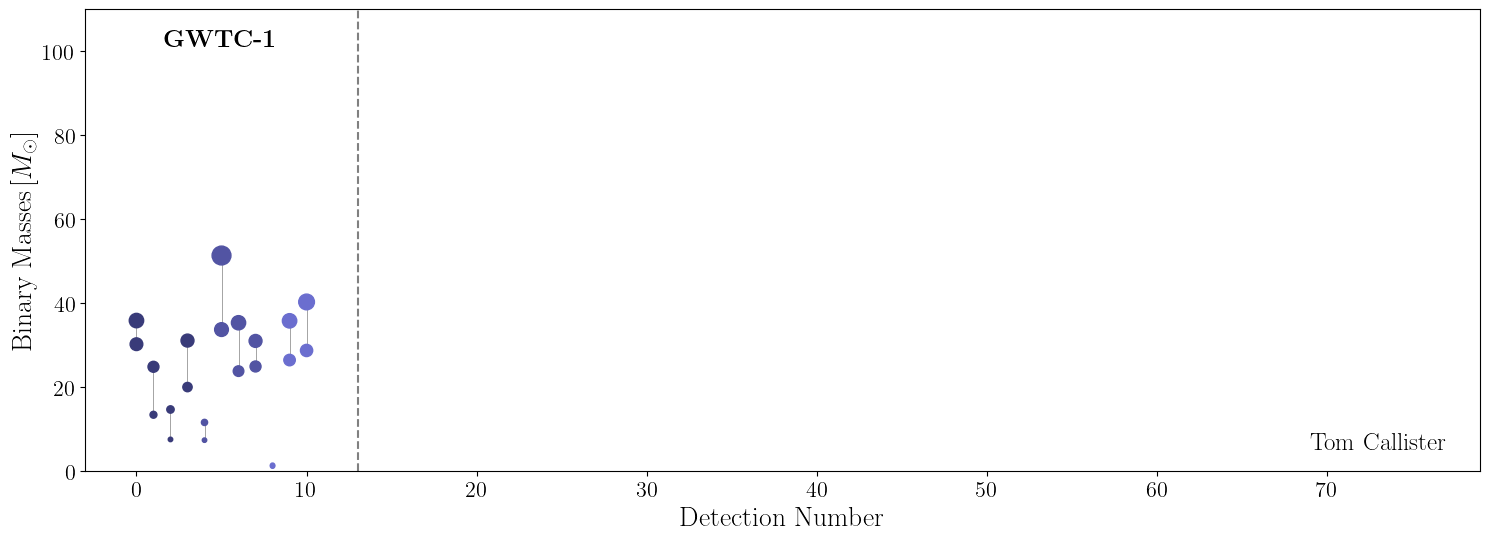

In [3]:
fig,ax = plt.subplots(figsize=(18,6))

colormap = plt.get_cmap('tab20b')
ax.set_prop_cycle('color',plt.cm.tab20b(np.linspace(0,1,len(sampleDict))))

for i,key in enumerate(list(sampleDict.keys())):
    
    if key[0]=="G":
            
        m1 = np.mean(sampleDict[key]['m1'])
        m2 = np.mean(sampleDict[key]['m2'])
        ax.scatter([i,i],[m1,m2],s=[max(10,0.5*m1**1.5),max(10,0.5*m2**1.5)])
        ax.plot([i,i],[m1,m2],color='grey',lw=0.5,zorder=-1)
        
ax.axvline(x=13,color='grey',ls='--')
ax.text(5,100,r"\bf{GWTC-1}",horizontalalignment='center',verticalalignment='bottom',fontsize=18)
ax.text(77,4,"Tom Callister",horizontalalignment='right',verticalalignment='bottom',fontsize=18)
    
ax.set_xlabel(r'Detection Number',fontsize=20)
ax.set_ylabel(r'Binary Masses\,$[M_\odot]$',fontsize=20)
ax.tick_params(axis='both', labelsize=16)
ax.set_xlim(-3,79)
ax.set_ylim(0,110)

plt.savefig('cbc_landscape_gwtc1.png',bbox_inches='tight',dpi=200)

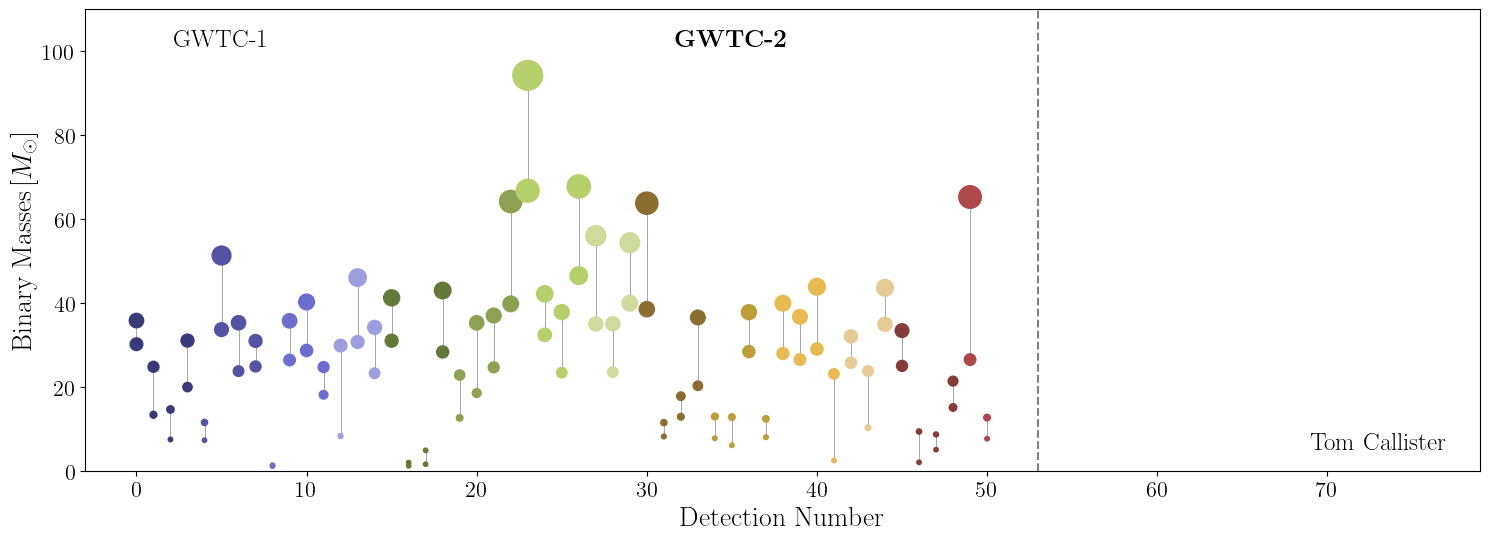

In [4]:
fig,ax = plt.subplots(figsize=(18,6))

colormap = plt.get_cmap('tab20b')
ax.set_prop_cycle('color',plt.cm.tab20b(np.linspace(0,1,len(sampleDict))))

for i,key in enumerate(list(sampleDict.keys())):
    
    if key[0]=="G" or int(key[1:5])<1910:
        
        m1 = np.mean(sampleDict[key]['m1'])
        m2 = np.mean(sampleDict[key]['m2'])
        ax.scatter([i,i],[m1,m2],s=[max(10,0.5*m1**1.5),max(10,0.5*m2**1.5)])
        ax.plot([i,i],[m1,m2],color='grey',lw=0.5,zorder=-1)
    
ax.axvline(x=53,color='grey',ls='--')
ax.text(5,100,r"GWTC-1",horizontalalignment='center',verticalalignment='bottom',fontsize=18)
ax.text(35,100,r"\bf{GWTC-2}",horizontalalignment='center',verticalalignment='bottom',fontsize=18)
ax.text(77,4,"Tom Callister",horizontalalignment='right',verticalalignment='bottom',fontsize=18)
    
ax.set_xlabel(r'Detection Number',fontsize=20)
ax.set_ylabel(r'Binary Masses\,$[M_\odot]$',fontsize=20)
ax.tick_params(axis='both', labelsize=16)
ax.set_xlim(-3,79)
ax.set_ylim(0,110)

plt.savefig('cbc_landscape_gwtc2.png',bbox_inches='tight',dpi=200)

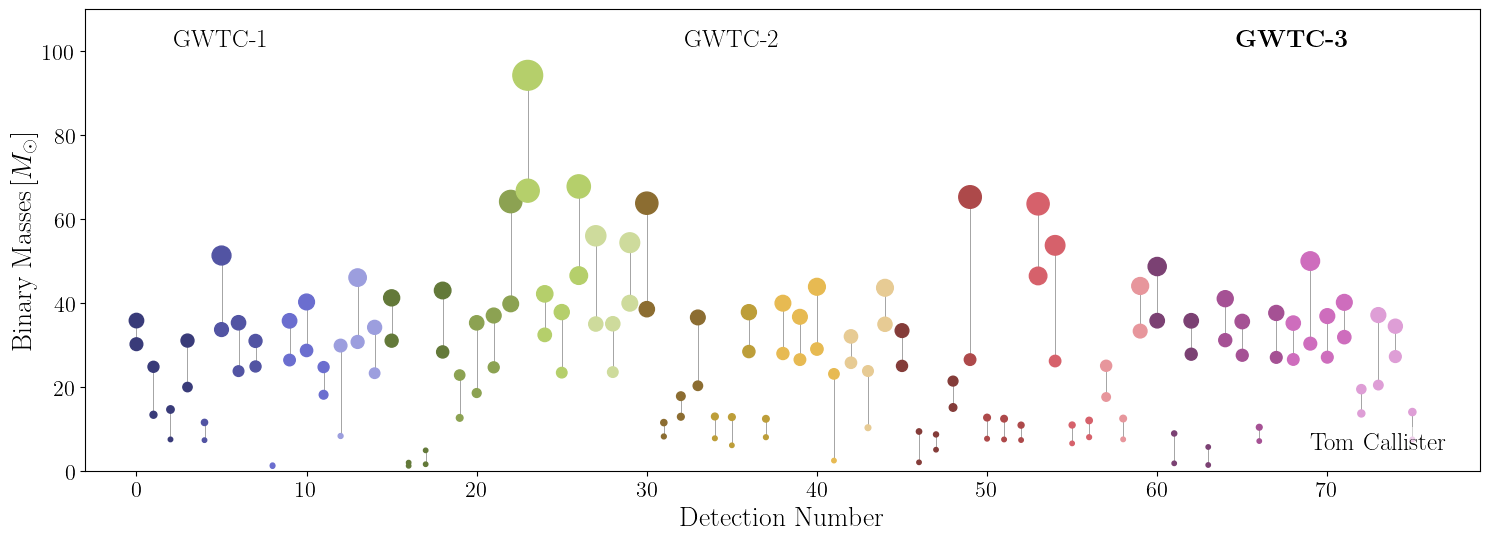

In [5]:
fig,ax = plt.subplots(figsize=(18,6))

colormap = plt.get_cmap('tab20b')
ax.set_prop_cycle('color',plt.cm.tab20b(np.linspace(0,1,len(sampleDict))))

for i,key in enumerate(list(sampleDict.keys())):
        
    m1 = np.mean(sampleDict[key]['m1'])
    m2 = np.mean(sampleDict[key]['m2'])
    ax.scatter([i,i],[m1,m2],s=[max(10,0.5*m1**1.5),max(10,0.5*m2**1.5)])
    ax.plot([i,i],[m1,m2],color='grey',lw=0.5,zorder=-1)
    
ax.text(5,100,r"GWTC-1",horizontalalignment='center',verticalalignment='bottom',fontsize=18)
ax.text(35,100,r"GWTC-2",horizontalalignment='center',verticalalignment='bottom',fontsize=18)
ax.text(68,100,r"\bf{GWTC-3}",horizontalalignment='center',verticalalignment='bottom',fontsize=18)
t = ax.text(77,4,"Tom Callister",horizontalalignment='right',verticalalignment='bottom',fontsize=18)
t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='None'))

ax.set_xlabel(r'Detection Number',fontsize=20)
ax.set_ylabel(r'Binary Masses\,$[M_\odot]$',fontsize=20)
ax.tick_params(axis='both', labelsize=16)
ax.set_xlim(-3,79)
ax.set_ylim(0,110)

plt.savefig('cbc_landscape_gwtc3.png',bbox_inches='tight',dpi=200)

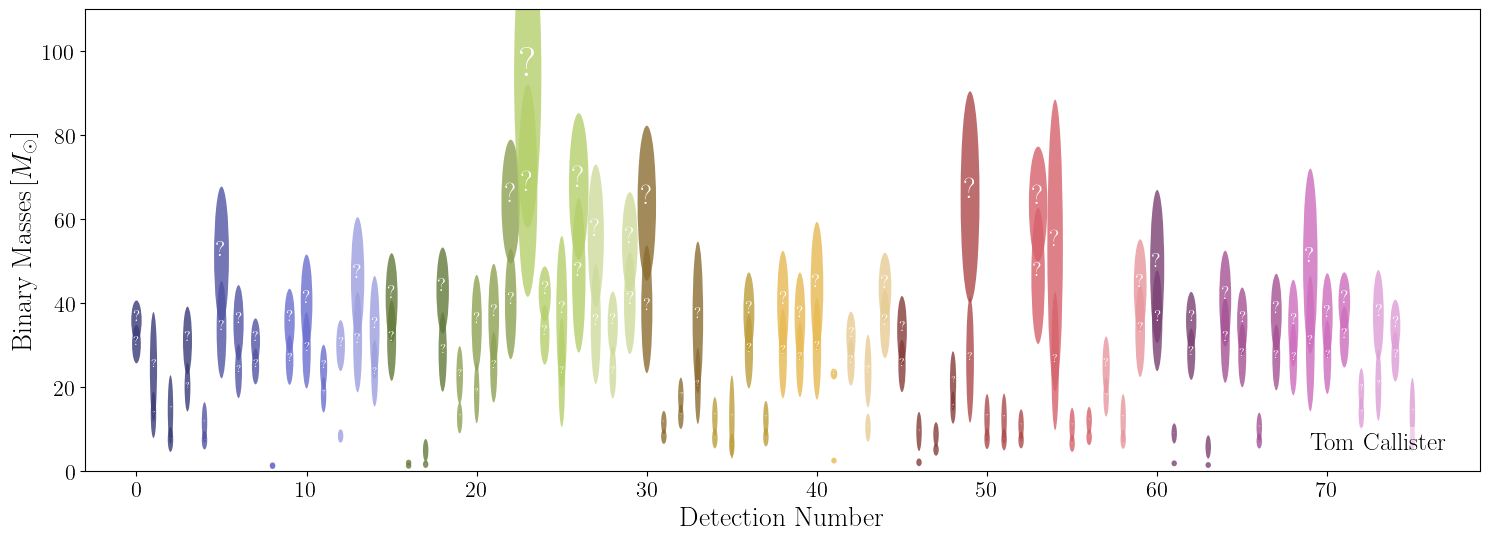

In [6]:
fig,ax = plt.subplots(figsize=(18,6))

colormap = plt.get_cmap('tab20b')

#ax.set_prop_cycle([colormap(k) for k in np.linspace(0, 1, 10)])
colors = plt.cm.tab20b(np.linspace(0,1,len(sampleDict)))
for i,key in enumerate(list(sampleDict.keys())):
    
    m1 = sampleDict[key]['m1']
    m2 = sampleDict[key]['m2']
        
    ellipse1 = Ellipse(xy=(i,np.mean(m1)),width=max(0.32,0.017*np.mean(m1)), height=max(1.4,4.*np.std(m1)), facecolor=colors[i],alpha=0.8)
    ellipse2 = Ellipse(xy=(i,np.mean(m2)),width=max(0.32,0.017*np.mean(m2)), height=max(1.4,4.*np.std(m2)), facecolor=colors[i],alpha=0.8)
    
    ax.add_artist(ellipse1)
    ax.add_artist(ellipse2)
    
    ax.text(i,np.mean(m1),"?",color='white',fontsize=int(13*(np.mean(m1)/40.)),horizontalalignment='center')
    ax.text(i,np.mean(m2),"?",color='white',fontsize=int(13*(np.mean(m2)/40.)),horizontalalignment='center')
    
t = ax.text(77,4,"Tom Callister",horizontalalignment='right',verticalalignment='bottom',fontsize=18)
t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='None'))
    
ax.set_xlabel(r'Detection Number',fontsize=20)
ax.set_ylabel(r'Binary Masses\,$[M_\odot]$',fontsize=20)
ax.tick_params(axis='both', labelsize=16)
ax.set_xlim(-3,79)
ax.set_ylim(0,110)

plt.savefig('cbc_landscape_gwtc3_with_errors.png',bbox_inches='tight',dpi=200)

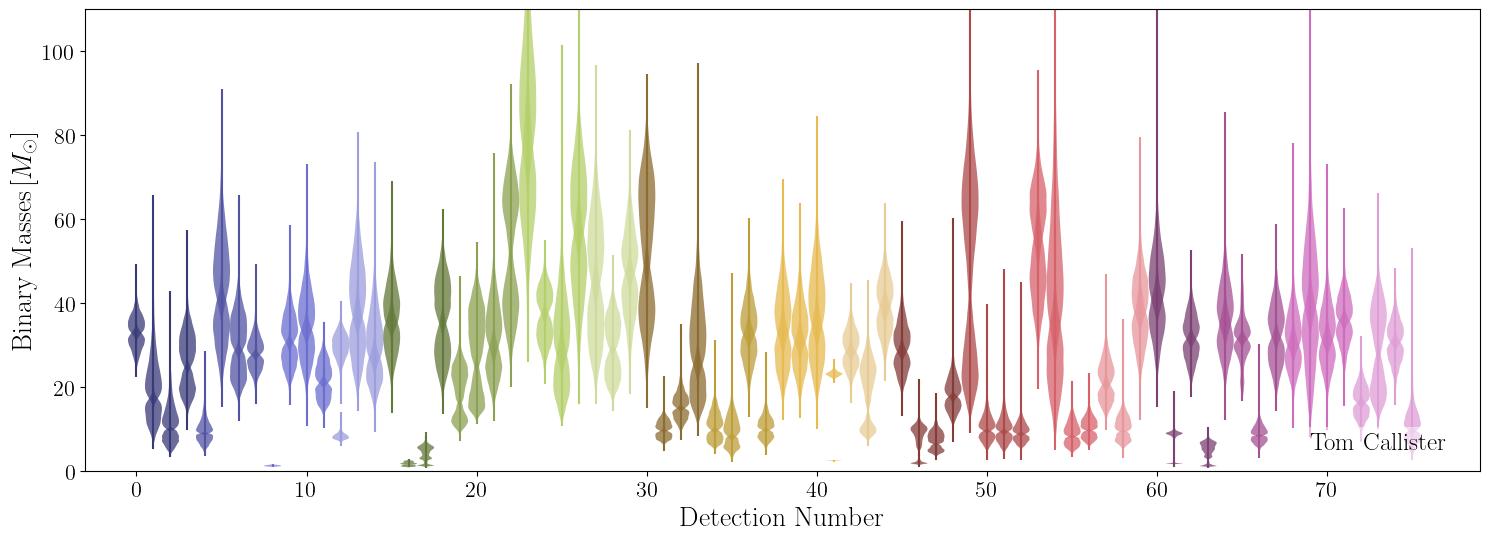

In [7]:
fig,ax = plt.subplots(figsize=(18,6))

colormap = plt.get_cmap('tab20b')

#ax.set_prop_cycle([colormap(k) for k in np.linspace(0, 1, 10)])
colors = plt.cm.tab20b(np.linspace(0,1,len(sampleDict)))
for i,key in enumerate(list(sampleDict.keys())):
    
    m1 = sampleDict[key]['m1']
    m2 = sampleDict[key]['m2']
    
    violins = ax.violinplot([m1,m2], positions=[i,i], showextrema=True, showmeans=False, widths=1, points=500)
    for pc in violins['bodies']:
        pc.set_facecolor(colors[i])
        pc.set_alpha(0.75)
        
    violins['cbars'].set_color(colors[i])
    violins['cmaxes'].set_linewidth(0)
    violins['cmins'].set_linewidth(0)
        
    ellipse1 = Ellipse(xy=(i,np.mean(m1)),width=max(0.32,0.017*np.mean(m1)), height=max(1.4,4.*np.std(m1)), facecolor=colors[i],alpha=0.8)
    ellipse2 = Ellipse(xy=(i,np.mean(m2)),width=max(0.32,0.017*np.mean(m2)), height=max(1.4,4.*np.std(m2)), facecolor=colors[i],alpha=0.8)
    
#     ax.add_artist(ellipse1)
#     ax.add_artist(ellipse2)
    
#     ax.text(i,np.mean(m1),"?",color='white',fontsize=int(13*(np.mean(m1)/40.)),horizontalalignment='center')
#     ax.text(i,np.mean(m2),"?",color='white',fontsize=int(13*(np.mean(m2)/40.)),horizontalalignment='center')
    
t = ax.text(77,4,"Tom Callister",horizontalalignment='right',verticalalignment='bottom',fontsize=18)
t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='None'))
    
ax.set_xlabel(r'Detection Number',fontsize=20)
ax.set_ylabel(r'Binary Masses\,$[M_\odot]$',fontsize=20)
ax.tick_params(axis='both', labelsize=16)
ax.set_xlim(-3,79)
ax.set_ylim(0,110)

plt.savefig('cbc_landscape_gwtc3_with_violinerrors.png',bbox_inches='tight',dpi=200)